这个文件调查了beta50_theta02中nrmse表现最好区域的hyperparameter_TIMs_taskperformance的关系

原文件名：test_narma10_allbeta50.ipynb

In [76]:
# collect the data from file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open("result_dict_beta50.pkl", "rb") as f:
    result_dict = pickle.load(f)

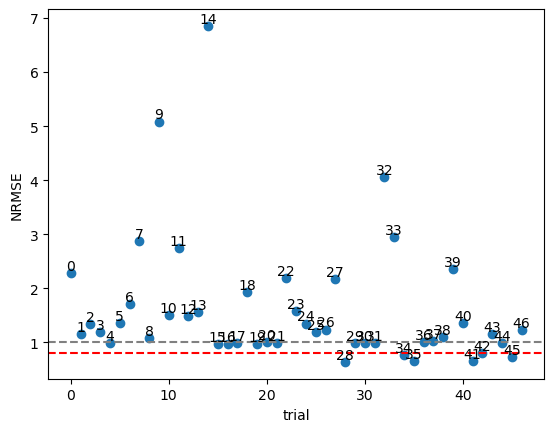

In [3]:
# 绘制所有结果的NRMSE
nrmse_list = [result_dict[idx]['NRMSE'] for idx in result_dict]
plt.scatter(range(len(nrmse_list)), nrmse_list)
# 每个点的上方显示该点的idx
for idx, nrmse in enumerate(nrmse_list):
    plt.text(idx, nrmse, str(idx), ha='center', va='bottom')
# 添加一条水平线，nrmse=1
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.xlabel('trial')
plt.ylabel('NRMSE')
plt.show()


In [6]:
# 打印出4th的数据
print(result_dict[28])


{'gamma': np.float64(0.0480297911638143), 'm0': np.float64(0.0516554082018051), 'CQ': np.float64(9.0), 'MC': np.float64(5.70081272188673), 'NRMSE': np.float64(0.636642332765109), 'y_test': array([[0.29983234],
       [0.53299757],
       [0.39674685],
       [0.3300046 ],
       [0.41748438],
       [0.55711258],
       [0.50053934],
       [0.3723152 ],
       [0.28658778],
       [0.26989271],
       [0.46305113],
       [0.34946828],
       [0.35241802],
       [0.45541824],
       [0.5330423 ],
       [0.48949152],
       [0.37539265],
       [0.28692045],
       [0.35821144],
       [0.49624343],
       [0.41606854],
       [0.50926278],
       [0.38241611],
       [0.34067948],
       [0.40111238],
       [0.31846082],
       [0.44252691],
       [0.4289834 ],
       [0.57246952],
       [0.53640129],
       [0.56995959],
       [0.41342413],
       [0.36669127],
       [0.41830927],
       [0.35750367],
       [0.61706689],
       [0.56284486],
       [0.46486799],
       [0.513

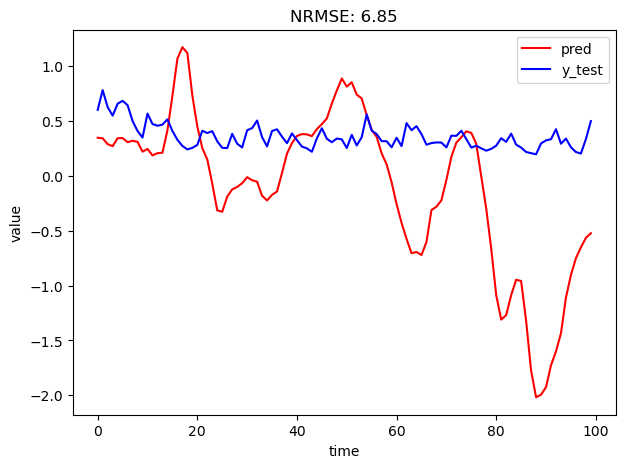

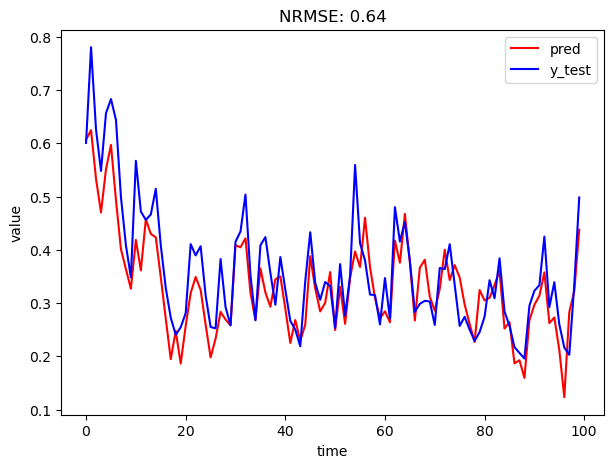

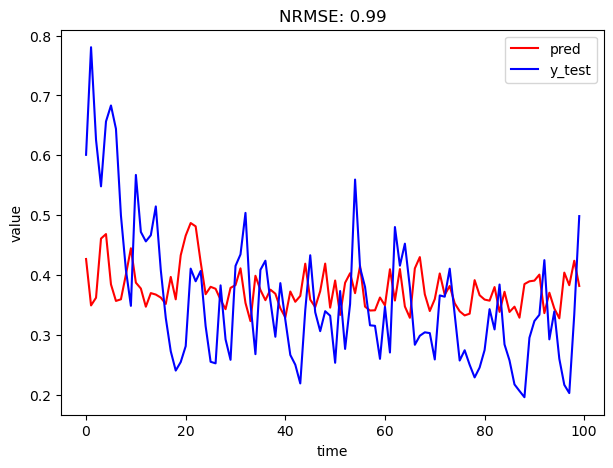

In [5]:
# 绘制出4th, 14th和28th的pred和y_test
plt.figure(figsize=(7, 5))
plt.plot(result_dict[14]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[14]['y_test'][100:200],'b',label='y_test')
plt.xlabel('time')
plt.ylabel('value')
plt.title(f'NRMSE: {result_dict[14]["NRMSE"]:.2f}')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(result_dict[28]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[28]['y_test'][100:200],'b',label='y_test')
plt.xlabel('time')
plt.ylabel('value')
plt.title(f'NRMSE: {result_dict[28]["NRMSE"]:.2f}')
plt.legend()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(result_dict[4]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[4]['y_test'][100:200],'b',label='y_test')
plt.xlabel('time')
plt.ylabel('value')
plt.title(f'NRMSE: {result_dict[4]["NRMSE"]:.2f}')
plt.legend()
plt.show()


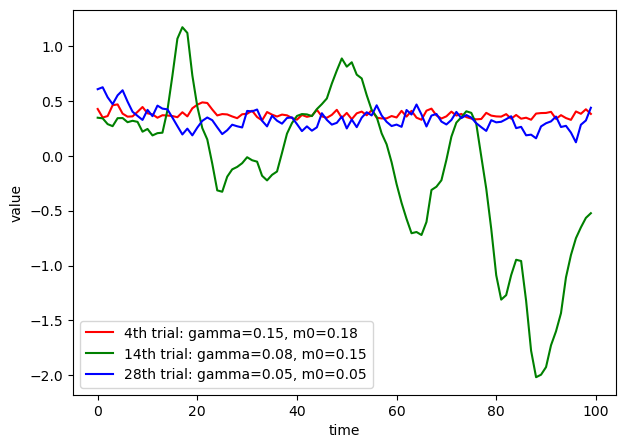

In [40]:
#对比三个trial的pred和y_test
trial_idx = [4, 14, 28]
plt.figure(figsize=(7, 5))
colors = ['r', 'g', 'b']
# plt.plot(result_dict[0]['y_test'][100:200],'k',label='y_test')
for idx, color in zip(trial_idx, colors):
    plt.plot(result_dict[idx]['pred'][100:200],label=f'{idx}th trial: gamma={result_dict[idx]["gamma"]:.2f}, m0={result_dict[idx]["m0"]:.2f}', color=color)

plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

In [41]:
# 通过分析trajectory的特征，来量化m0和gamma的影响。
# 选择的特征：
# 1. 最大振幅
# 2. 标准差
# 3. 主频
def get_trajectory_features(pred, fs=1):
    pred = np.asarray(pred)

    # 1. 最大振幅
    max_amplitude = np.max(pred)-np.min(pred)

    # 2. 标准差
    std_dev = np.std(pred)

    # 3. 主频
    freqs = np.fft.fftfreq(len(pred), d=1/fs)
    magnitude = np.abs(np.fft.rfft(pred - np.mean(pred)))
    dominant_freq = freqs[np.argmax(magnitude[1:]) + 1] if len(freqs) > 1 else 0.0

    return max_amplitude, std_dev, dominant_freq



In [44]:
# 计算下44th的trajectory特征
max_amplitude, std_dev, dominant_freq = get_trajectory_features(result_dict[44]['pred'])
print(f"44th trial: max_amplitude={max_amplitude:.2f}, std_dev={std_dev:.2f}, dominant_freq={dominant_freq:.2f}")

# 计算下y_test的trajectory特征
max_amplitude_y_test, std_dev_y_test, dominant_freq_y_test = get_trajectory_features(result_dict[44]['y_test'])
print(f"y_test: max_amplitude={max_amplitude_y_test:.2f}, std_dev={std_dev_y_test:.2f}, dominant_freq={dominant_freq_y_test:.2f}")

# 计算下28th的trajectory特征
max_amplitude, std_dev, dominant_freq = get_trajectory_features(result_dict[28]['pred'])
print(f"28th trial: max_amplitude={max_amplitude:.2f}, std_dev={std_dev:.2f}, dominant_freq={dominant_freq:.2f}")



44th trial: max_amplitude=0.24, std_dev=0.02, dominant_freq=0.02
y_test: max_amplitude=0.62, std_dev=0.11, dominant_freq=0.05
28th trial: max_amplitude=0.66, std_dev=0.09, dominant_freq=0.00


In [62]:
# 遍历所有trial，计算trajectory特征
# create a dict to store the trajectory features
features = {}

# 计算y_test的特征作为基准点
max_amplitude_y_test, std_dev_y_test, dominant_freq_y_test = get_trajectory_features(result_dict[0]['y_test'])


for idx, trial in result_dict.items():
    max_amplitude, std_dev, dominant_freq = get_trajectory_features(result_dict[idx]['pred'])
    # 计算特征点与y_test的特征点的三维距离
    dist = np.sqrt((max_amplitude-max_amplitude_y_test)**2+(std_dev-std_dev_y_test)**2+(dominant_freq-dominant_freq_y_test)**2)
    features[idx] = {
        'max_amplitude': max_amplitude,
        'std_dev': std_dev,
        'dominant_freq': dominant_freq,
        'dist': dist
    }


<Figure size 700x500 with 0 Axes>

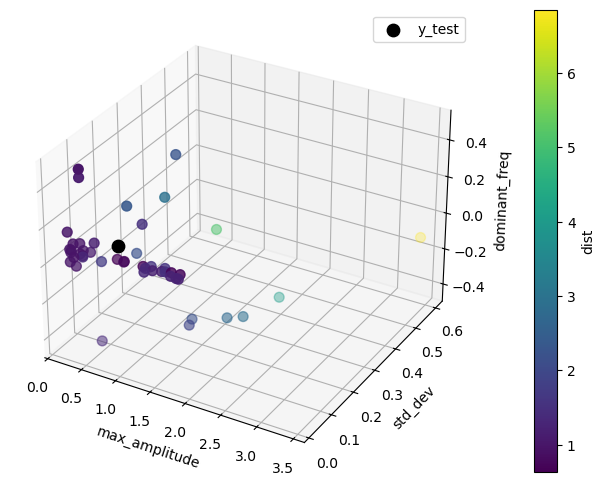

In [65]:
# 可视化不同trial的特征与y_test的特征的差异

plt.figure(figsize=(7, 5))
# 三维散点图，x=max_amplitude, y=std_dev, z=dominant_freq, 颜色为NRMSE
from mpl_toolkits.mplot3d import Axes3D

max_amplitudes = [features[idx]['max_amplitude'] for idx in features]
std_devs = [features[idx]['std_dev'] for idx in features]
dominant_freqs = [features[idx]['dominant_freq'] for idx in features]
nrmse_list = [result_dict[idx]['NRMSE'] for idx in features]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(max_amplitudes, std_devs, dominant_freqs, c=nrmse_list, cmap='viridis', s=50)
# 画y_test的特征点
ax.scatter(max_amplitude_y_test, std_dev_y_test, dominant_freq_y_test, color='black', label='y_test', s=80)
ax.set_xlabel('max_amplitude')
ax.set_ylabel('std_dev')
ax.set_zlabel('dominant_freq')
cb = plt.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('dist')
ax.legend()
plt.show()


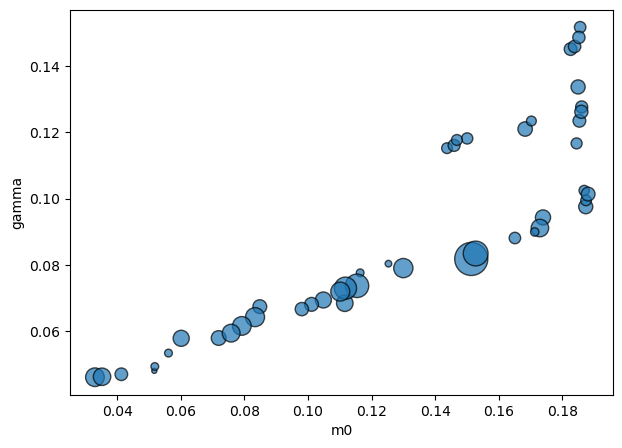

In [66]:
# 可视化不同trial的m0和gamma与dist的关系
plt.figure(figsize=(7, 5))
m0s = [result_dict[idx]['m0'] for idx in result_dict]
gammas = [result_dict[idx]['gamma'] for idx in result_dict]
dist = [features[idx]['dist'] for idx in features]
plt.scatter(m0s, gammas, s=np.array(dist)*200, alpha=0.7, edgecolors='k')
plt.xlabel('m0')
plt.ylabel('gamma')
plt.show()
    


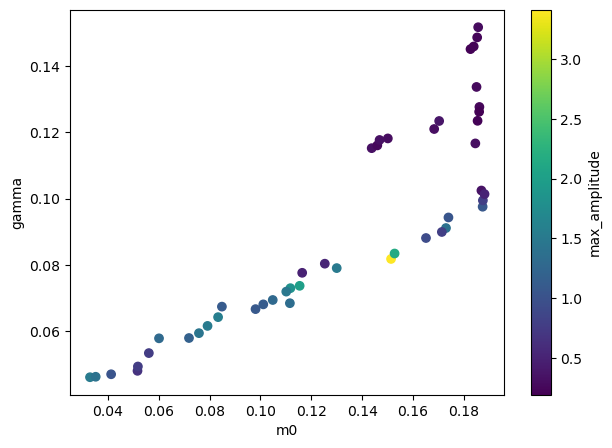

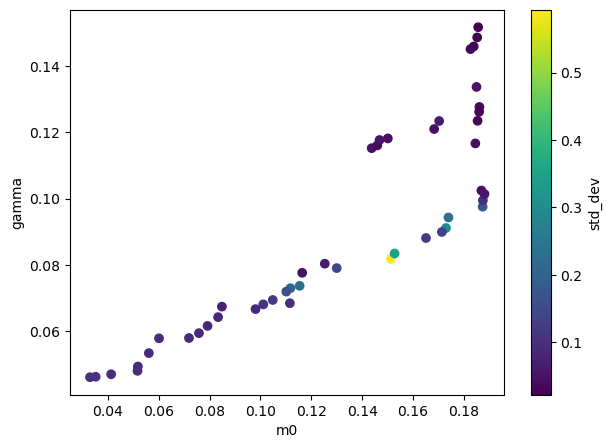

In [68]:
# 画一个散点图，横坐标是m0，纵坐标是gamma，颜色是max_amplitude
plt.figure(figsize=(7, 5))
plt.scatter(m0s, gammas, c=max_amplitudes, cmap='viridis')
plt.xlabel('m0')
plt.ylabel('gamma')
plt.colorbar(label='max_amplitude')
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(m0s, gammas, c=std_devs, cmap='viridis')
plt.xlabel('m0')
plt.ylabel('gamma')
plt.colorbar(label='std_dev')
plt.show()


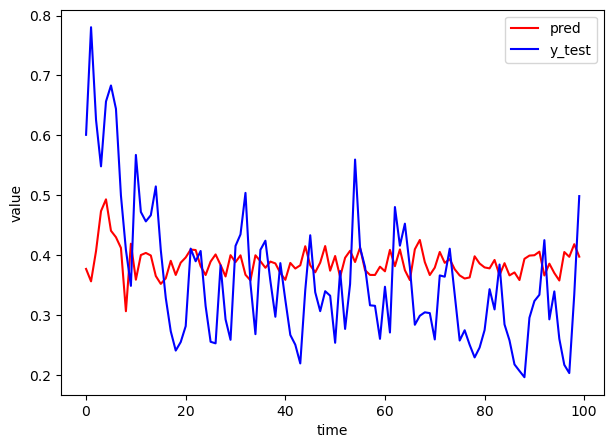

0.9779517251686383


In [24]:
# 单独查看下44th trial的pred和y_test
plt.figure(figsize=(7, 5))
plt.plot(result_dict[44]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[44]['y_test'][100:200],'b',label='y_test')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

print(result_dict[44]['NRMSE'])

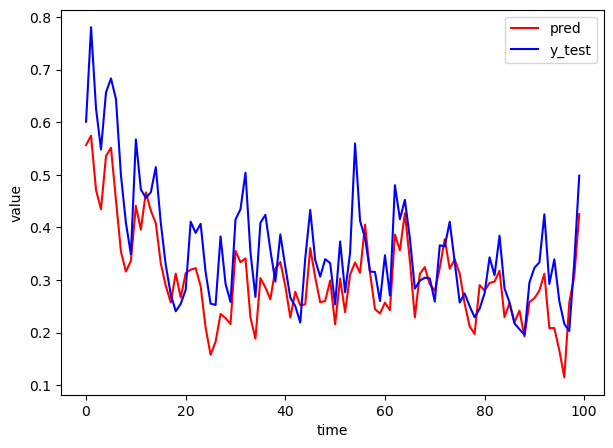

0.8032023384482746


In [23]:
# 单独查看下42th trial的pred和y_test
plt.figure(figsize=(7, 5))
plt.plot(result_dict[42]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[42]['y_test'][100:200],'b',label='y_test')
plt.xlabel('time')  
plt.ylabel('value')
plt.legend()
plt.show()

print(result_dict[42]['NRMSE'])

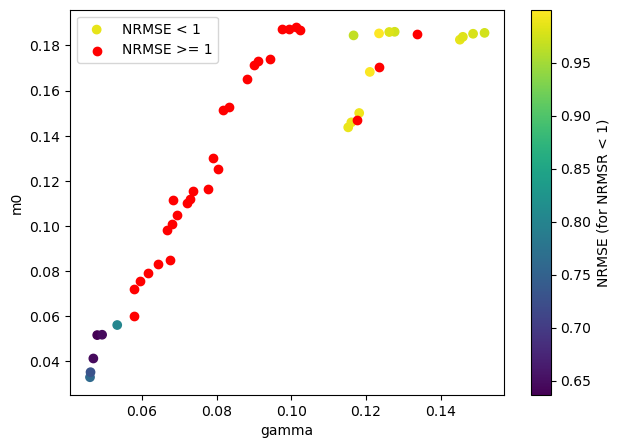

In [18]:
# 可视化gamma,m0与nrmse的关系
# 使用颜色条来表示nrmse的大小
plt.figure(figsize=(7, 5))
# 语法有问题。result_dict是一个以trial编号为key的字典，不是DataFrame，不能直接用result_dict['gamma']等方式取出所有gamma、m0、NRMSE。
# 正确做法是遍历result_dict，分别取出gamma、m0、NRMSE组成列表或数组：
gammas = [result_dict[idx]['gamma'] for idx in result_dict]
m0s = [result_dict[idx]['m0'] for idx in result_dict]
nrmse = [result_dict[idx]['NRMSE'] for idx in result_dict]
# 将nrmse>1.2的点的颜色统一为红色
import numpy as np
import matplotlib as mpl

# 先为nrmse<1的点分配颜色，nrmse>=1的点为红色
nrmse = np.array(nrmse)
gammas = np.array(gammas)
m0s = np.array(m0s)

mask = nrmse < 1
# 画nrmse<1的点，使用colormap
sc = plt.scatter(gammas[mask], m0s[mask], c=nrmse[mask], cmap='viridis', label='NRMSE < 1')
# 画nrmse>=1的点，统一为红色
plt.scatter(gammas[~mask], m0s[~mask], color='red', label='NRMSE >= 1')

plt.xlabel('gamma')
plt.ylabel('m0')
plt.colorbar(sc, label='NRMSE (for NRMSR < 1)')
plt.legend()
plt.show()

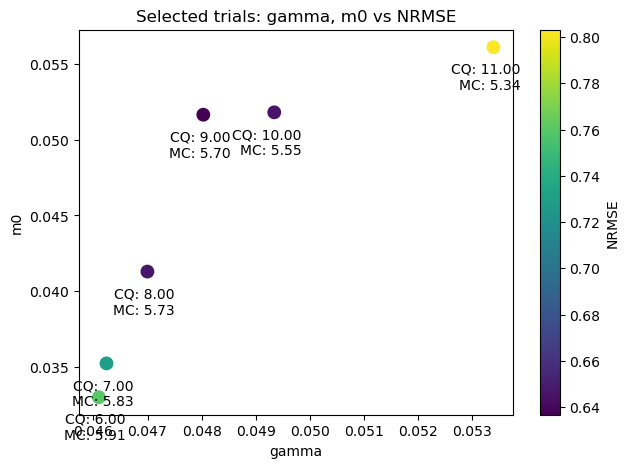

In [36]:
# 单独画出28,34,35,41,42,45的gamma和m0与nrmse的关系
# 颜色没有均匀分布的原因是：每次plt.scatter只画一个点，c参数只是单个数值，colormap不会被利用，所有点都显示为colormap的同一端点色。
# 正确做法：把这几个点的NRMSE收集成数组，一起画，c参数传数组，colormap才会映射。
plt.figure(figsize=(7, 5))
selected_idxs = [28, 34, 35, 41, 42, 45]
gammas_sel = [result_dict[idx]['gamma'] for idx in selected_idxs]
m0s_sel = [result_dict[idx]['m0'] for idx in selected_idxs]
nrmse_sel = [result_dict[idx]['NRMSE'] for idx in selected_idxs]
sc = plt.scatter(gammas_sel, m0s_sel, c=nrmse_sel, cmap='viridis', s=80)
for i, idx in enumerate(selected_idxs):
    # 每个点上方显示该点的CQ和MC
    plt.text(
        gammas_sel[i]+0.0005, m0s_sel[i]-0.001,
        f'CQ: {result_dict[idx]["CQ"]:.2f}\nMC: {result_dict[idx]["MC"]:.2f}',
        fontsize=10, ha='right', va='top'
    )
plt.xlabel('gamma')
plt.ylabel('m0')
plt.colorbar(sc, label='NRMSE')
plt.title('Selected trials: gamma, m0 vs NRMSE')
plt.show()

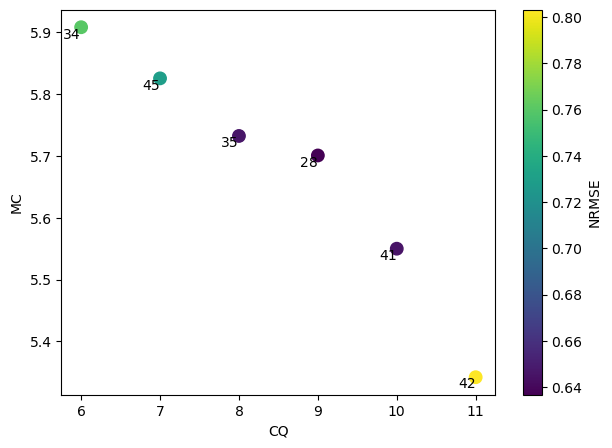

In [38]:
plt.figure(figsize=(7, 5))
selected_idxs = [28, 34, 35, 41, 42, 45]
CQs_sel = [result_dict[idx]['CQ'] for idx in selected_idxs]
MCs_sel = [result_dict[idx]['MC'] for idx in selected_idxs]
nrmse_sel = [result_dict[idx]['NRMSE'] for idx in selected_idxs]
sc = plt.scatter(CQs_sel, MCs_sel, c=nrmse_sel, cmap='viridis', s=80)
for i, idx in enumerate(selected_idxs):
    # 每个点上方显示该点的CQ和MC
    plt.text(
        CQs_sel[i], MCs_sel[i],
        f'{idx}',
        fontsize=10, ha='right', va='top'
    )
plt.xlabel('CQ')
plt.ylabel('MC')
plt.colorbar(sc, label='NRMSE')
plt.show()

对于m0和gamma特定范围内进行grid search。接下来进行可视化和数据分析

In [7]:
# load the results
# from formal_Parameter_Dynamics_Preformance import task_types


with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053/results.pkl', 'rb') as f:
    result_dict_1 = pickle.load(f)

runs_1 = result_dict_1['runs']
print(type(runs_1))
print(len(runs_1))
print(runs_1[0].keys())

result_dict_1 = runs_1[0]['results']
task_types_1 = runs_1[0]['task']
is_multi_param_1 = runs_1[0]['is_multi_param']
total_combinations_1 = runs_1[0]['total_combinations']
param_grid_1 = runs_1[0]['param_grid']
param_names_1 = runs_1[0]['param_names']
print(result_dict_1)
print(task_types_1)
print(is_multi_param_1)
print(total_combinations_1)
print(param_grid_1)
print(param_names_1)





<class 'list'>
3
dict_keys(['task', 'is_multi_param', 'results', 'param_grid', 'param_names', 'total_combinations'])
{'param_combinations': [{'m0': np.float64(0.03), 'gamma': np.float64(0.045)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.04588888888888889)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.04677777777777778)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.04766666666666666)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.04855555555555555)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.049444444444444444)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.050333333333333334)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.051222222222222225)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.05211111111111111)}, {'m0': np.float64(0.03), 'gamma': np.float64(0.053)}, {'m0': np.float64(0.032777777777777774), 'gamma': np.float64(0.045)}, {'m0': np.float64(0.032777777777777774), 'gamma': np.float64(0.04588888888888889)}, {'m0': np.float64(0.032777777777777774), 'gamma': 

In [41]:
MC_data = runs[0]['results']['MC']
print(MC_data)

[np.float64(5.973888639065236), np.float64(5.880358239277166), np.float64(5.880078478845415), np.float64(5.901358160075203), np.float64(5.854689357340407), np.float64(5.898675796986499), np.float64(5.893713910603409), np.float64(5.897566070365659), np.float64(5.853429509666206), np.float64(5.85441666085058), np.float64(5.841395869150604), np.float64(5.855447512445165), np.float64(5.850304488348866), np.float64(5.862836689353465), np.float64(5.88878764252609), np.float64(5.859046815530998), np.float64(5.851615856658237), np.float64(5.79139099956754), np.float64(5.816873607099821), np.float64(5.7781577998363005), np.float64(5.775091294675638), np.float64(5.776919874812119), np.float64(5.7758912231629065), np.float64(5.7975018205037125), np.float64(5.839872366143048), np.float64(5.841506400022249), np.float64(5.824752292432202), np.float64(5.80347589773687), np.float64(5.79915809932304), np.float64(5.730647881581882), np.float64(5.745828403220458), np.float64(5.768848450392373), np.float6

In [3]:
# 使用插值法平滑数据
from scipy.interpolate import griddata
import numpy as np
import pandas as pd

def interpolation(x, y, z, nx=200, ny=200):
    x = np.asarray(x).ravel()   
    y = np.asarray(y).ravel()
    z = np.asarray(z).ravel()

    # confirm the length of x and y are the same
    if x.shape[0] != y.shape[0] or x.shape[0] != z.shape[0]:
        raise ValueError("x and y must have the same length")
    
    # generate the grid
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)
    Xi, Yi = np.meshgrid(xi, yi)

    # interpolate the data
    zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    return Xi, Yi, zi

In [10]:
def plot_heatmap(x, y, zi, xlabel = 'm0', ylabel = 'gamma',value_label='MC'):

    plt.figure(figsize=(10, 8))
    ax = plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
                   cmap='viridis', aspect='auto', origin='lower')

    # 添加颜色条并设置标签
    cbar = plt.colorbar(ax)
    cbar.set_label(value_label, fontsize=14)
    cbar.ax.tick_params(labelsize=14)

    # 设置轴标签
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # 格式化x和y轴刻度为三位小数
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]
    plt.xticks(x_ticks, [f'{tick:.3f}' for tick in x_ticks], fontsize=14)
    plt.yticks(y_ticks, [f'{tick:.3f}' for tick in y_ticks], fontsize=14)

    # 颠倒gamma轴方向
    # plt.gca().invert_yaxis()

    plt.show()


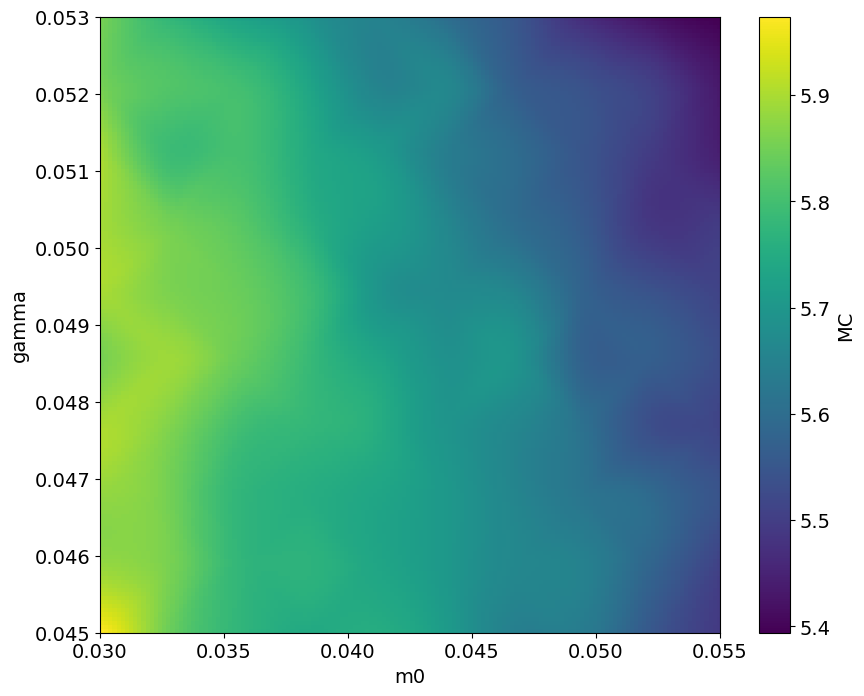

In [89]:
results = runs[0]['results']

x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(results['MC'])     # 长度=100

# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='MC')

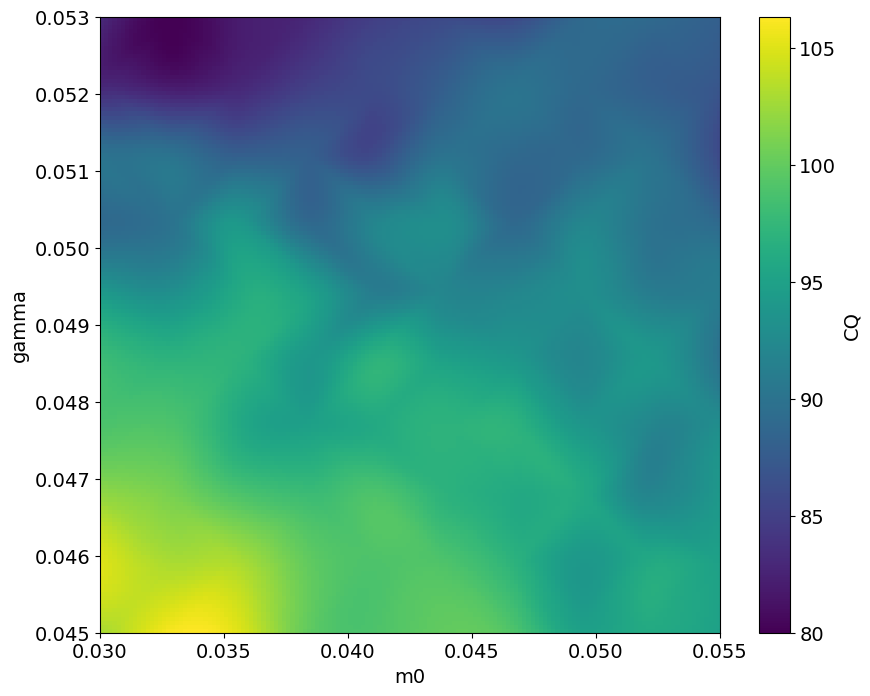

In [100]:
results = runs[1]['results']

x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(results['CQ'])     # 长度=100

# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='CQ')

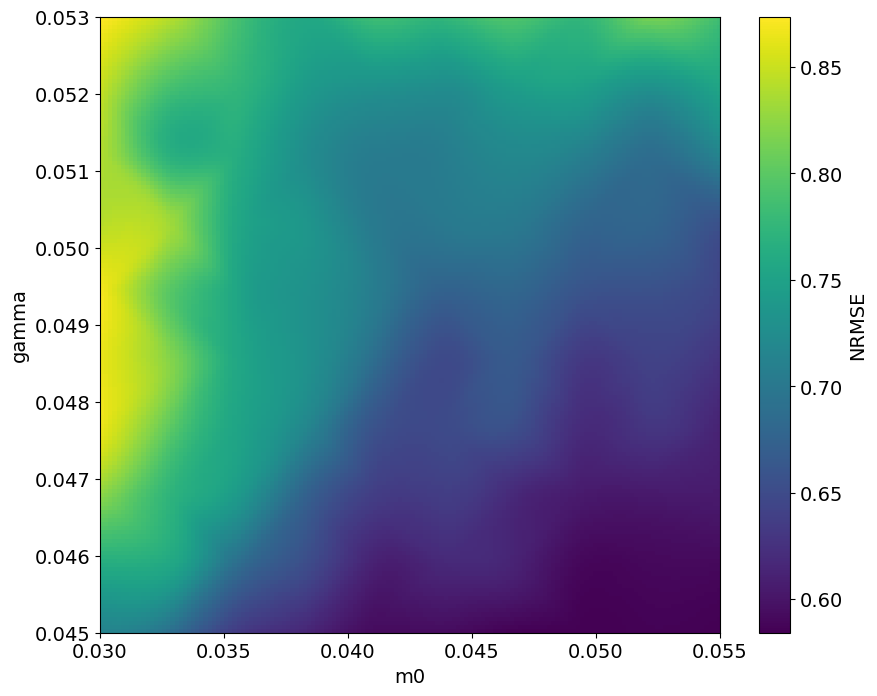

In [101]:
results = runs[2]['results']

x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(results['NRMSE'])     # 长度=100

# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='NRMSE')

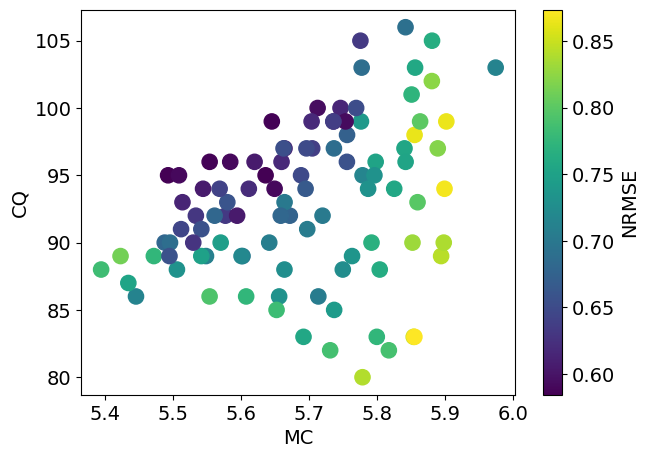

In [93]:
# cq和mc与nrmse的关系

x = np.array(runs[0]['results']['MC'])
y = np.array(runs[1]['results']['CQ'])
z = np.array(runs[2]['results']['NRMSE'])

# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('CQ',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()




TI46的任务表现

In [3]:
# load the results
with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_TI46/results.pkl', 'rb') as f:
    result_dict_2 = pickle.load(f)

runs_2 = result_dict_2['runs']
print(type(runs_2))
# print(len(runs_2))
print(runs_2[3].keys())
print("runs_2的长度为:", len(runs_2))


# result_dict_2 = runs_2[0]['results']
# task_2 = runs_2[0]['task']
# is_multi_param_2 = runs_2[0]['is_multi_param']
# total_combinations_2 = runs_2[0]['total_combinations']
# param_grid_2 = runs_2[0]['param_grid']
# param_names_2 = runs_2[0]['param_names']
# print(result_dict_2)
# print(task_2)
# print(is_multi_param_2)
# print(total_combinations_2)
# print(param_grid_2)
# print(param_names_2)

<class 'list'>
dict_keys(['task', 'is_multi_param', 'results', 'param_grid', 'param_names', 'total_combinations'])
runs_2的长度为: 4


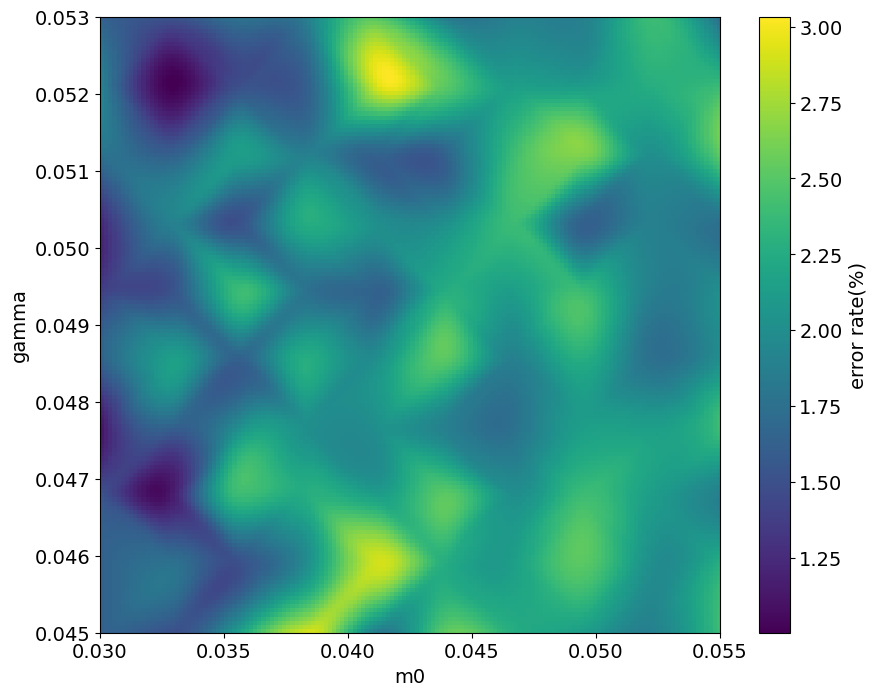

: 

In [ ]:
results = runs_2[3]['results']



x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(runs_2[3]['results']['acc'])    # 长度=100
z = (1 - z )* 100
# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='error rate(%)')

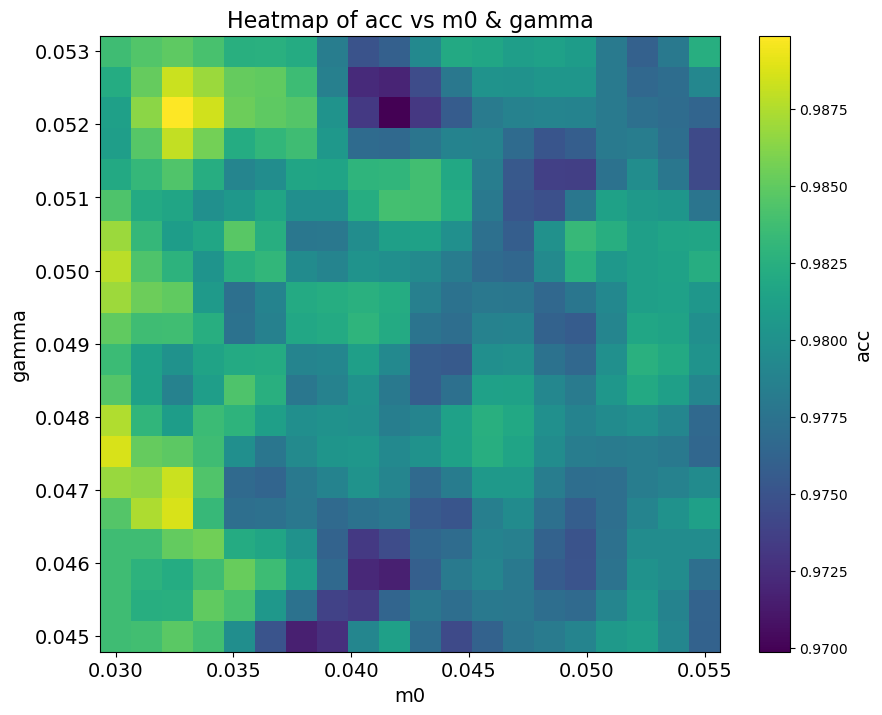

In [59]:
# 还是想用热力图来看看
results = runs_2[3]['results']
x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(runs_2[3]['results']['acc'])    # 长度=100

# 先插值成网格数据，再画热力图
Xi, Yi, zi = interpolation(x, y, z, nx=20, ny=20)

plt.figure(figsize=(10,8))
plt.pcolormesh(Xi, Yi, zi, cmap='viridis', shading='auto')
cbar = plt.colorbar()
cbar.set_label('acc', fontsize=14)
plt.xlabel('m0', fontsize=14)
plt.ylabel('gamma', fontsize=14)
plt.title('Heatmap of acc vs m0 & gamma', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

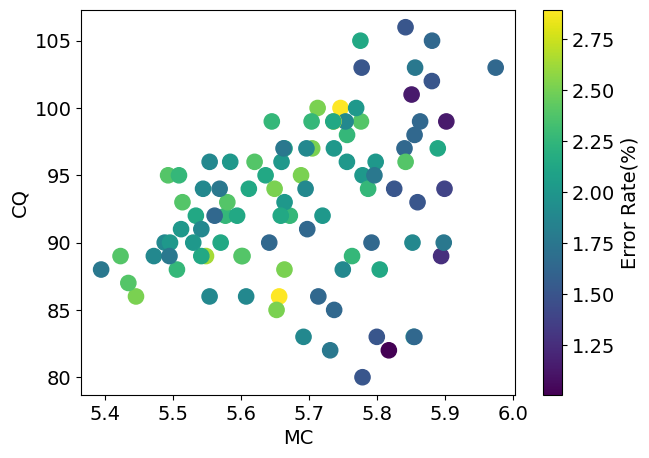

In [36]:
x = np.array(runs_1[0]['results']['MC'])
y = np.array(runs_1[1]['results']['CQ'])
z = np.array(runs_2[3]['results']['acc'])
# 将z的acc转为误差率，公式1-acc*100
z = (1 - z )* 100


# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('CQ',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

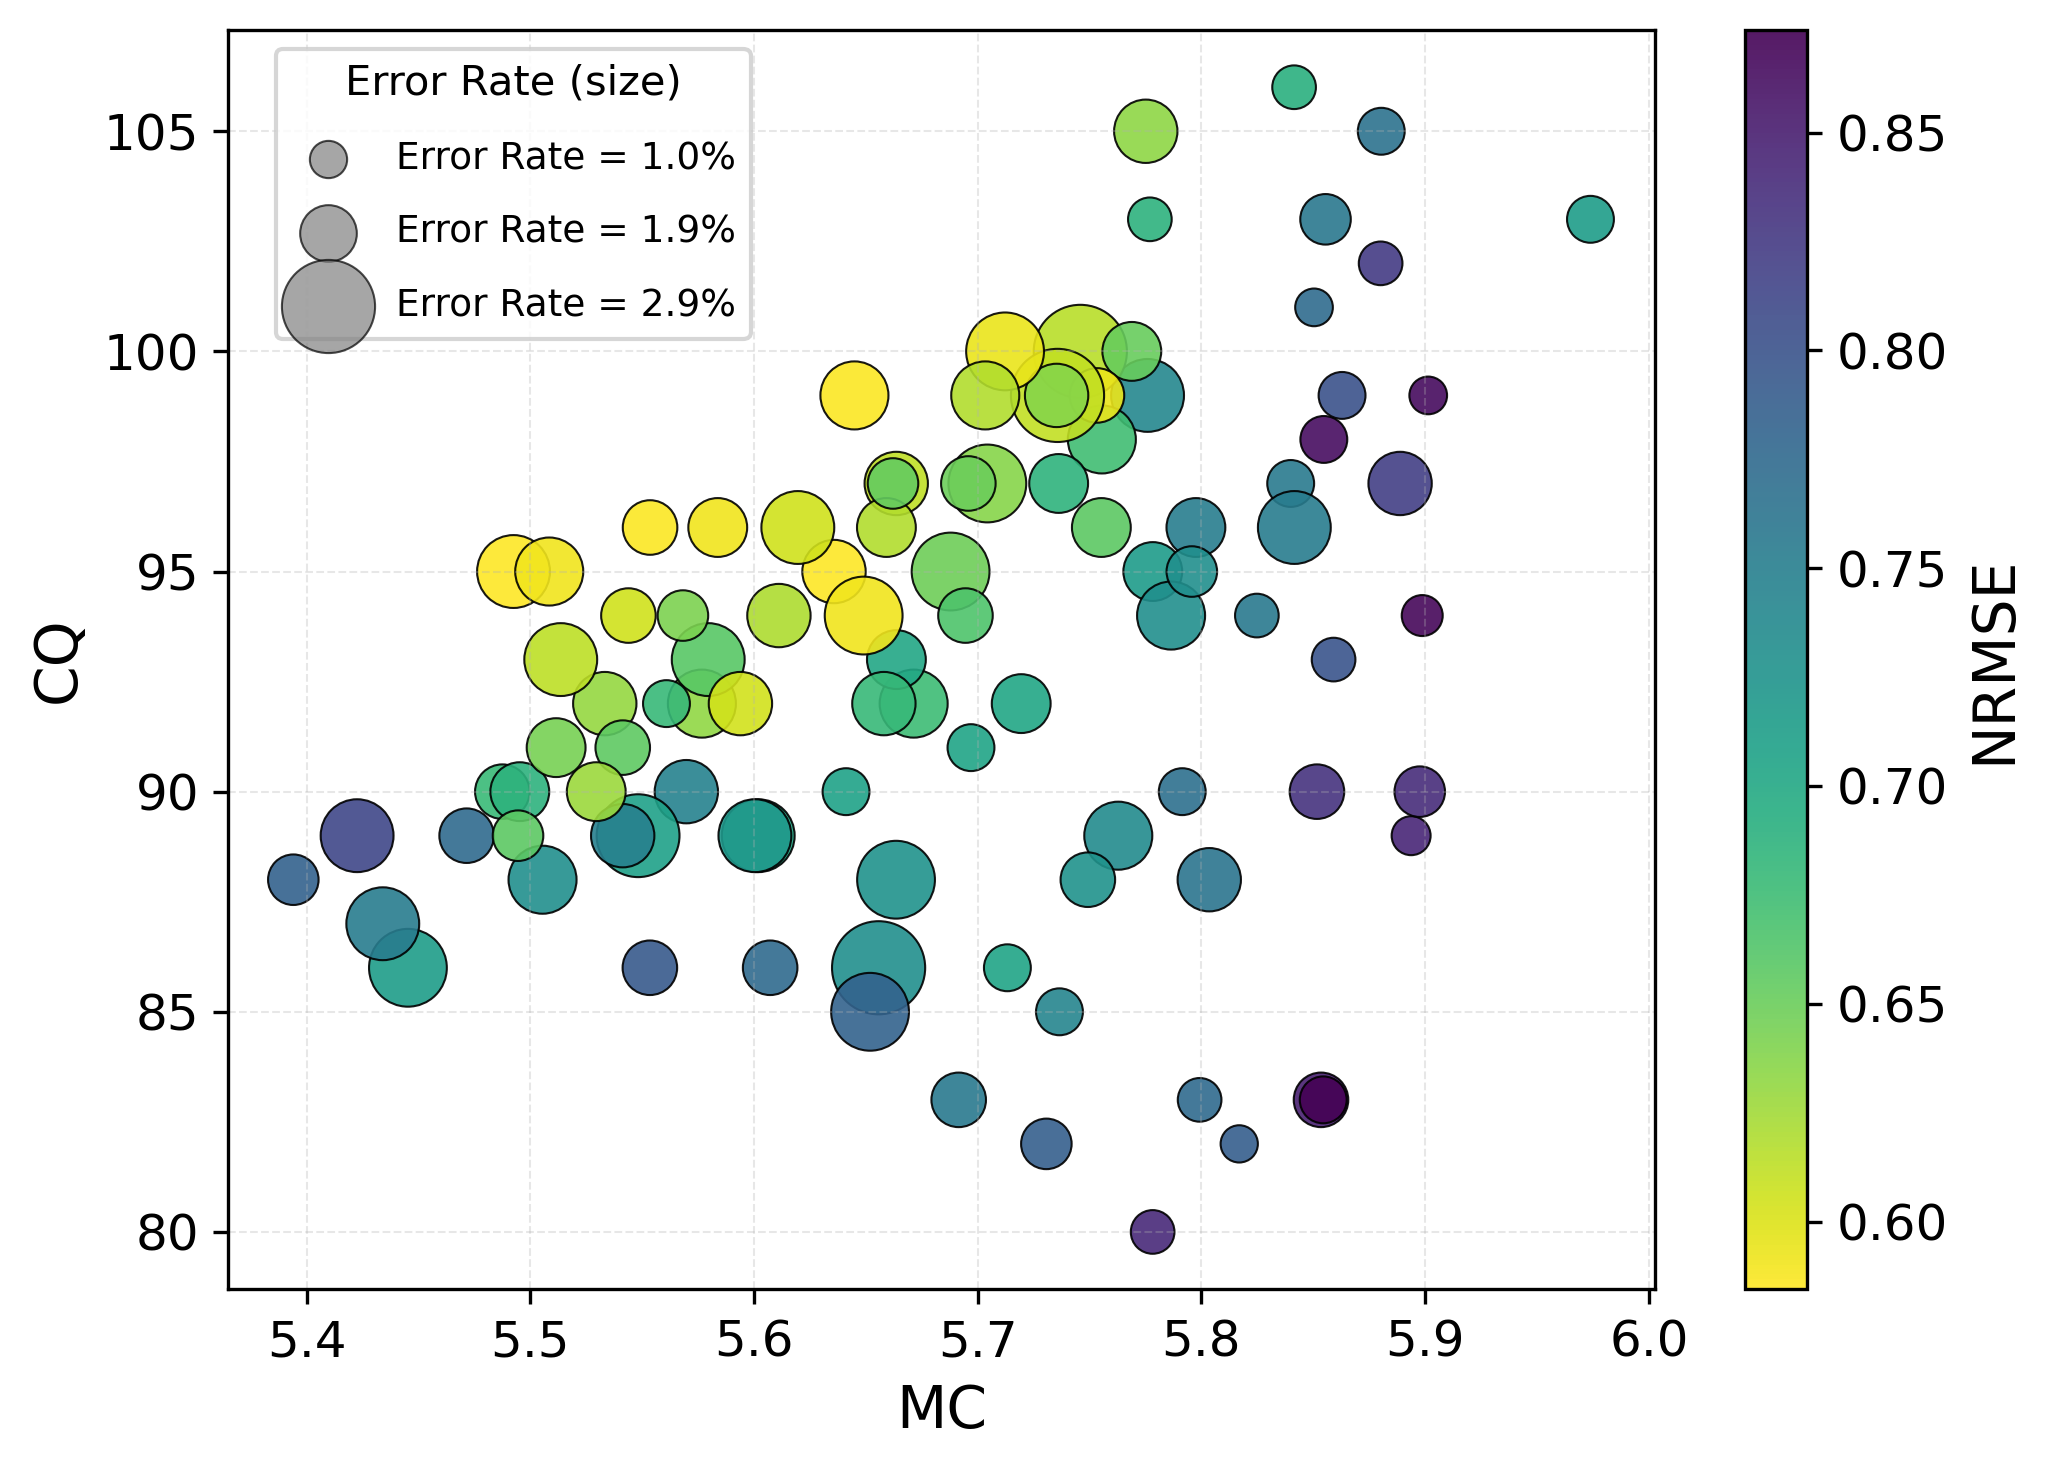

In [44]:
# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_1[1]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5), dpi=300)

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'Error Rate = {val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(0.02, 1.0)
)
# 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()



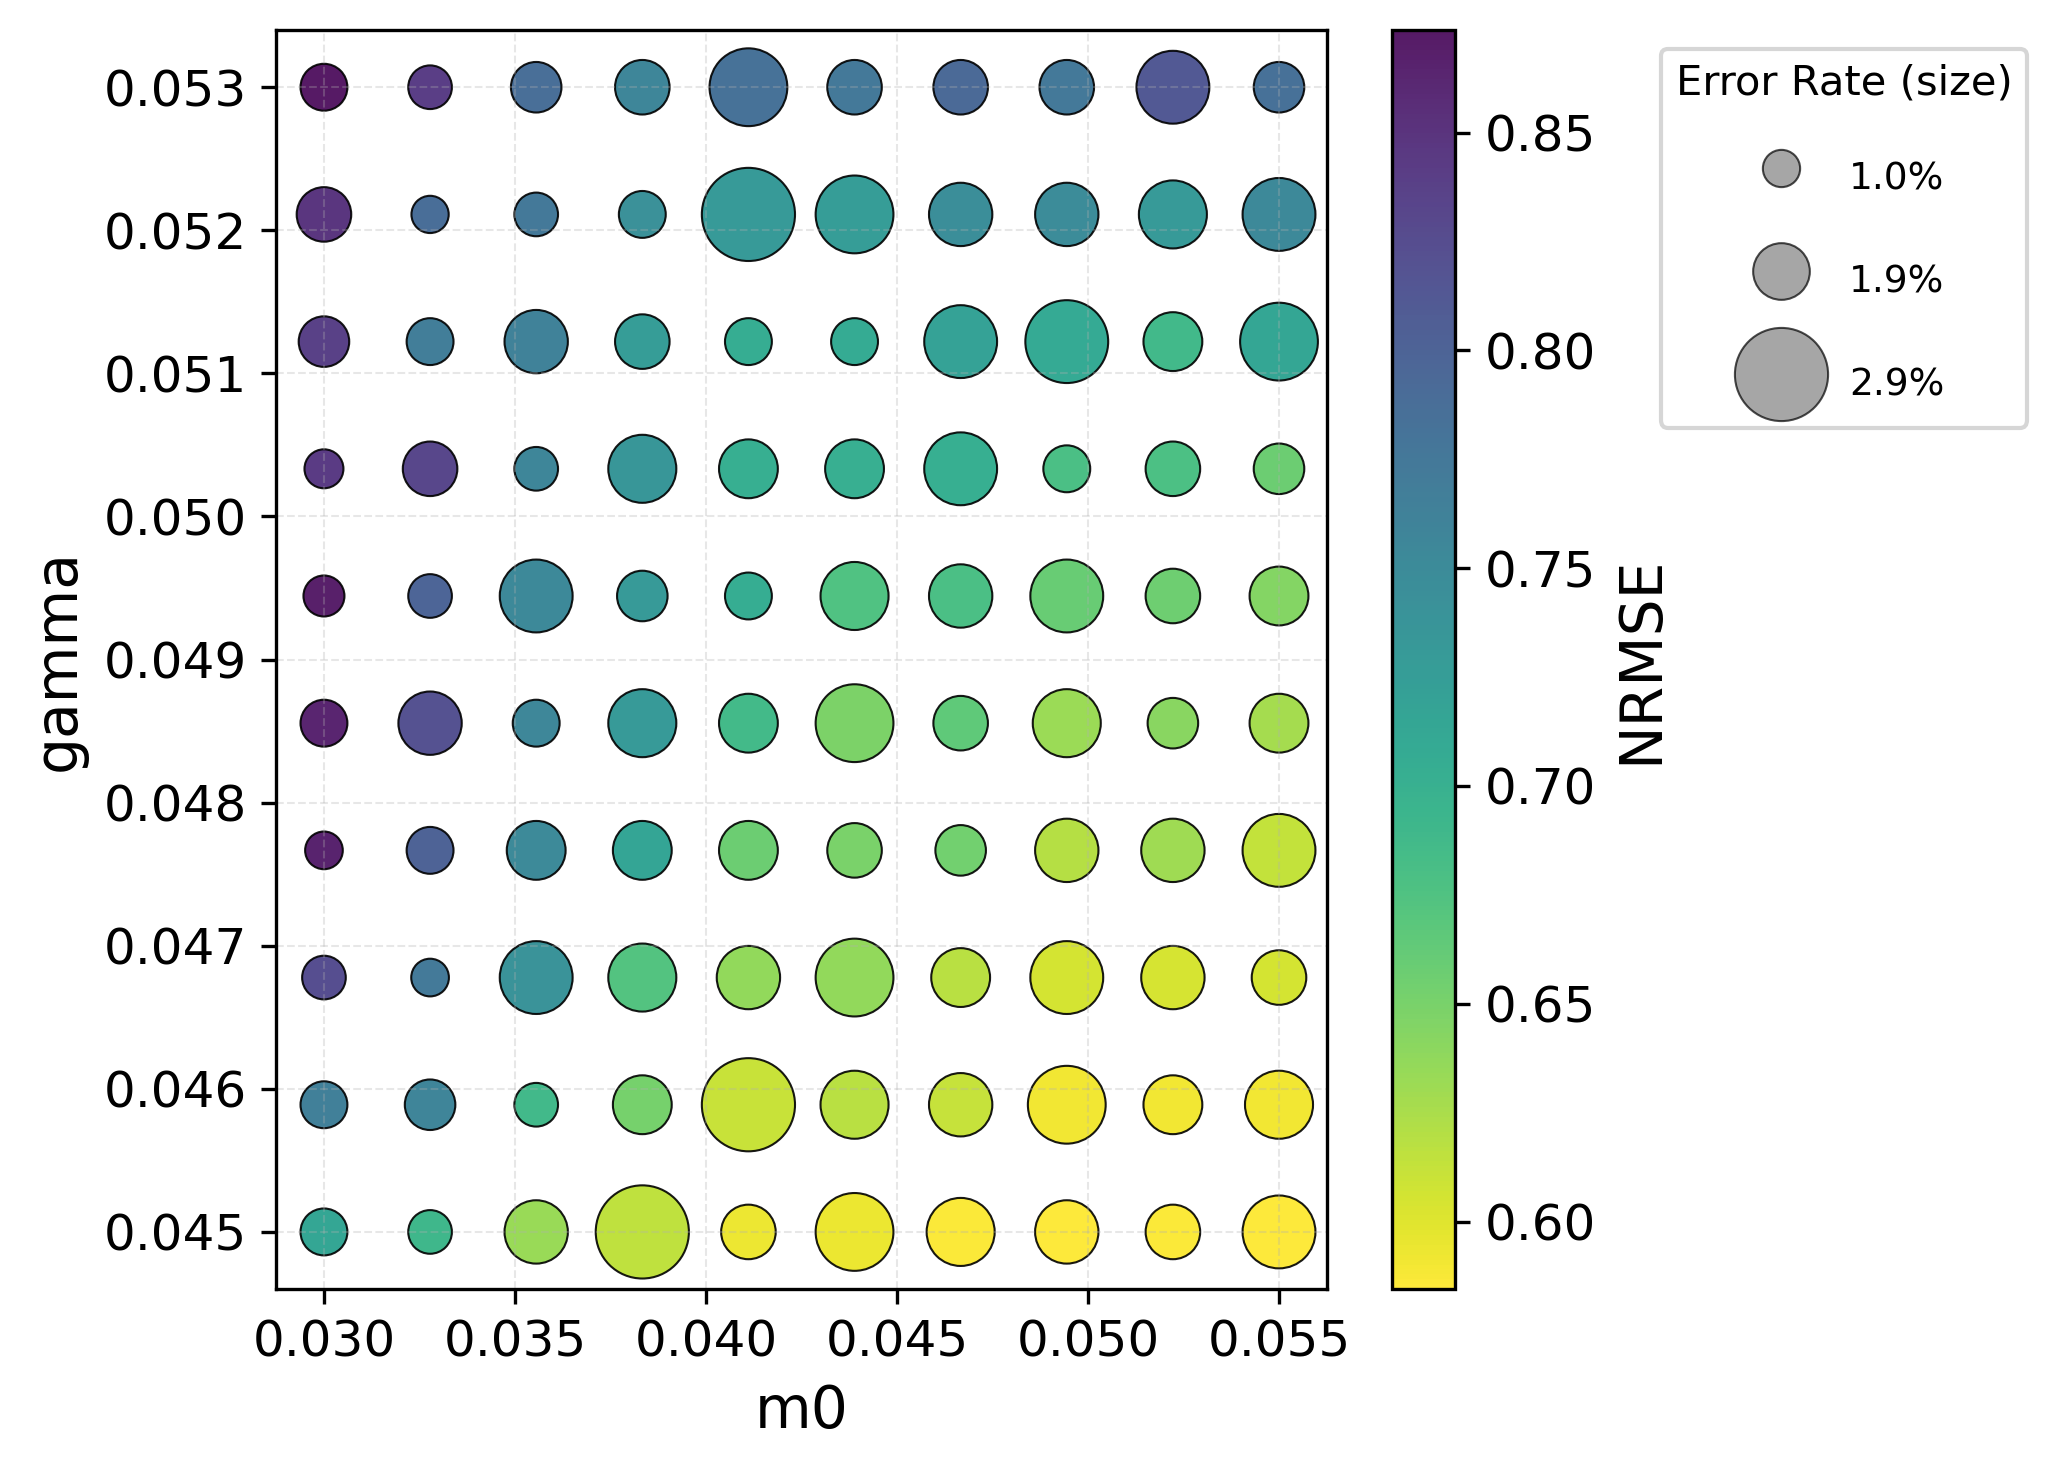

In [51]:
# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['m0'])        # MC
y = np.array(runs_1[1]['results']['gamma'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5), dpi=300)

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'{val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1.2,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(1.3, 1.0),
    ncol=1,  # 竖向排列
    columnspacing=1.0,
    handleheight=2.0
)
# 轴标签

plt.xlabel('m0', fontsize=14)
plt.ylabel('gamma', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

重新计算了threshold=0.1条件下的KRandGR, 看看当前的分布情况

In [47]:
# load the results
with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053/results.pkl', 'rb') as f:
    result_dict_1 = pickle.load(f)
runs_1 = result_dict_1['runs']

with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_TI46/results.pkl', 'rb') as f:
    result_dict_2 = pickle.load(f)

runs_2 = result_dict_2['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR/results.pkl', 'rb') as f:
    result_dict_3 = pickle.load(f)

runs_3 = result_dict_3['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR01/results.pkl', 'rb') as f:
    result_dict_4 = pickle.load(f)

runs_4 = result_dict_4['runs']


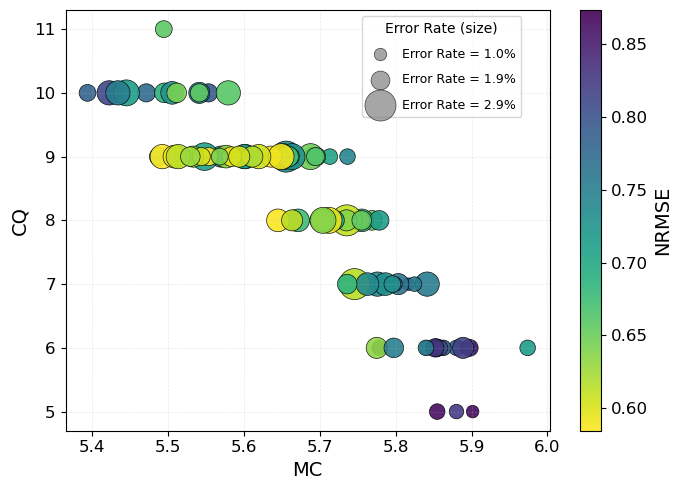

In [13]:
# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_3[0]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'Error Rate = {val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(0.6, 1.0)
)
# 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

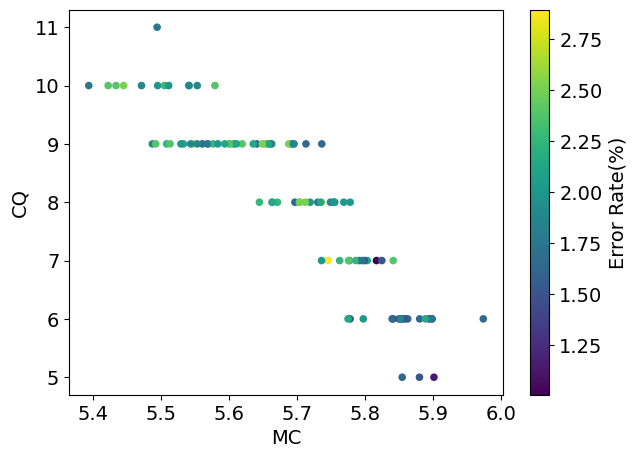

In [22]:
x = np.array(runs_1[0]['results']['MC'])
y = np.array(runs_3[0]['results']['CQ'])
z = np.array(runs_2[3]['results']['acc'])
# 将z的acc转为误差率，公式1-acc*100
z = (1 - z )* 100


# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=20)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('CQ',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

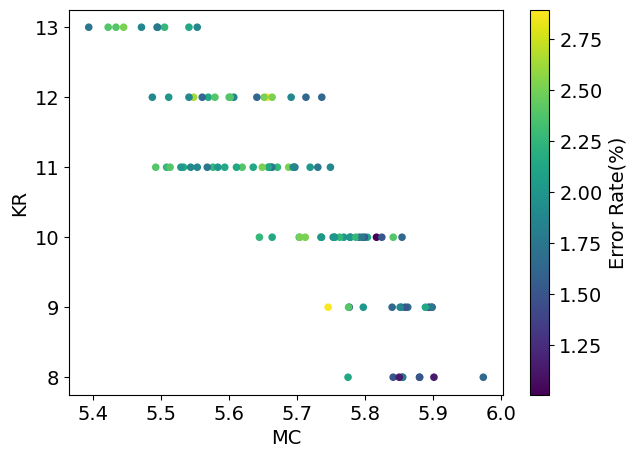

In [24]:
x = np.array(runs_1[0]['results']['MC'])
y = np.array(runs_3[0]['results']['KR'])
z = np.array(runs_2[3]['results']['acc'])
# 将z的acc转为误差率，公式1-acc*100
z = (1 - z )* 100


# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=20)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('KR',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

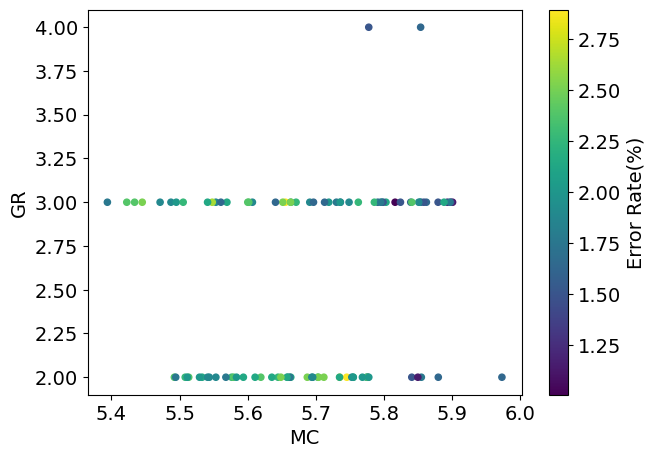

In [20]:
x = np.array(runs_1[0]['results']['MC'])
y = np.array(runs_3[0]['results']['GR'])
z = np.array(runs_2[3]['results']['acc'])
# 将z的acc转为误差率，公式1-acc*100
z = (1 - z )* 100


# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=20)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('GR',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

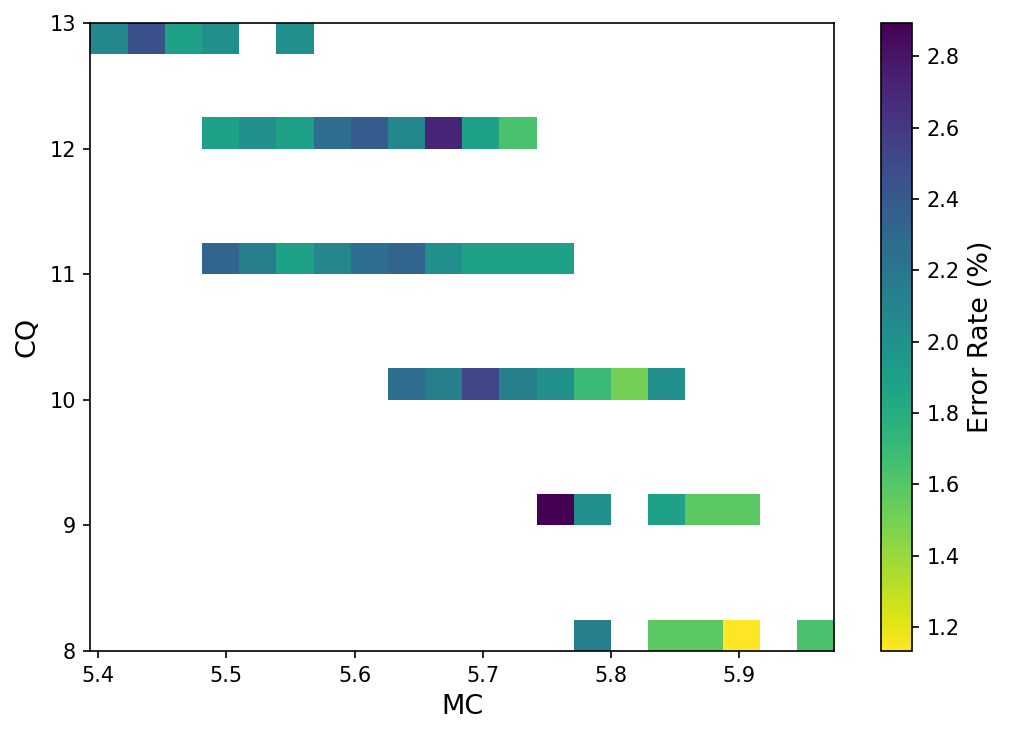

In [25]:
from scipy.stats import binned_statistic_2d

# 网格数量可按数据量调整
xbins = 20
ybins = 20

stat, xedge, yedge, _ = binned_statistic_2d(
    x, y, z, statistic='median',  # 可选 'mean'/'median'
    bins=[xbins, ybins]
)

# 作图
plt.figure(figsize=(7,5), dpi=150)
# 注意：binned_statistic_2d 返回的是 [ybin, xbin] 排列
im = plt.pcolormesh(xedge, yedge, stat.T, cmap='viridis_r', shading='auto')
cbar = plt.colorbar(im)
cbar.set_label('Error Rate (%)', fontsize=13)

plt.xlabel('MC', fontsize=13)
plt.ylabel('CQ', fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()

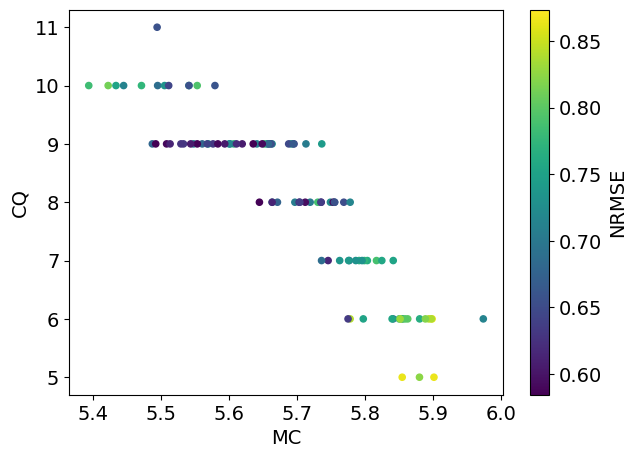

In [18]:
x = np.array(runs_1[0]['results']['MC'])
y = np.array(runs_3[0]['results']['CQ'])
z = np.array(runs_1[2]['results']['NRMSE'])
# # 将z的acc转为误差率，公式1-acc*100
# z = (1 - z )* 100


# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=20)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('CQ',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

采用threshold=0.1来看看

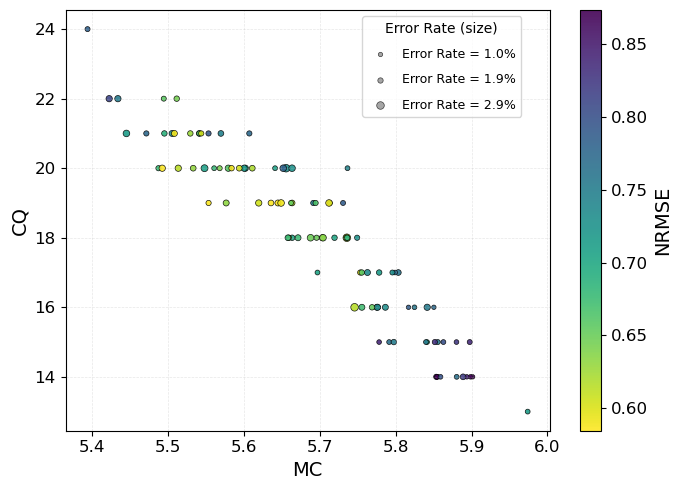

In [75]:
# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_4[0]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 10 + 20 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 10 + 20 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'Error Rate = {val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(0.6, 1.0)
)
# 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

尝试看看不同均一化的方法计算后的CQ与任务表现之间是否存在着相关性

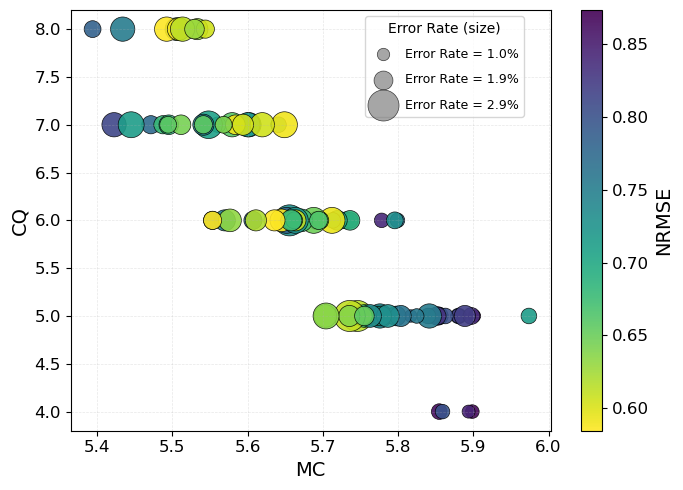

In [14]:
# load the results
with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053/results.pkl', 'rb') as f:
    result_dict_1 = pickle.load(f)
runs_1 = result_dict_1['runs']

with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_TI46/results.pkl', 'rb') as f:
    result_dict_2 = pickle.load(f)

runs_2 = result_dict_2['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_normalised0/1_KRandGR01/results.pkl', 'rb') as f:
    result_dict_3 = pickle.load(f)

runs_3 = result_dict_3['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR01/results.pkl', 'rb') as f:
    result_dict_4 = pickle.load(f)

runs_4 = result_dict_4['runs']

# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_3[0]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'Error Rate = {val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(0.6, 1.0)
)
# 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

 不同的threshold

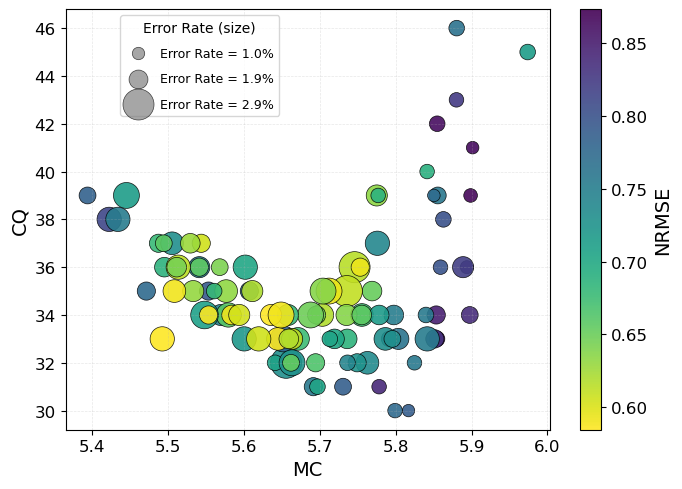

In [19]:
# load the results
with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053/results.pkl', 'rb') as f:
    result_dict_1 = pickle.load(f)
runs_1 = result_dict_1['runs']

with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_TI46/results.pkl', 'rb') as f:
    result_dict_2 = pickle.load(f)

runs_2 = result_dict_2['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_normalized01_KRandGR0001/results.pkl', 'rb') as f:
    result_dict_3 = pickle.load(f)

runs_3 = result_dict_3['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR01/results.pkl', 'rb') as f:
    result_dict_4 = pickle.load(f)

runs_4 = result_dict_4['runs']

# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_3[0]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# ---------------------
# 点大小映射 (Error Rate -> size)
err_min, err_max = err_rate.min(), err_rate.max()
# 归一化后平方拉伸，避免极端差异
err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    x, y,
    s=sizes,
    c=nrmse,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# 自定义点大小图例 (用几个典型的 error rate)
for val in np.linspace(err_min, err_max, 3):
    size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
    plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
                label=f'Error Rate = {val:.1f}%')
plt.legend(
    scatterpoints=1, frameon=True, labelspacing=1,
    title="Error Rate (size)", fontsize=9, title_fontsize=10,
    loc='upper left', bbox_to_anchor=(0.1, 1.0)
)
# 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

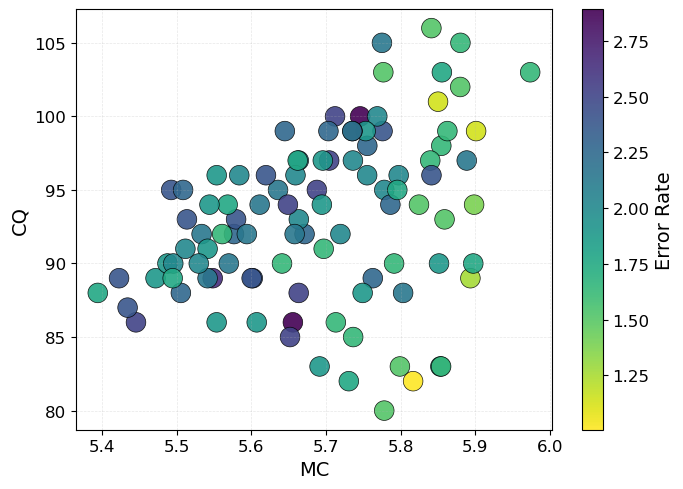

In [28]:
# load the results
with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053/results.pkl', 'rb') as f:
    result_dict_1 = pickle.load(f)
runs_1 = result_dict_1['runs']

with open ('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_TI46/results.pkl', 'rb') as f:
    result_dict_2 = pickle.load(f)

runs_2 = result_dict_2['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR01/results.pkl', 'rb') as f:
    result_dict_3 = pickle.load(f)

runs_3 = result_dict_3['runs']

with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.055_gamma0.045-0.053_KRandGR01/results.pkl', 'rb') as f:
    result_dict_4 = pickle.load(f)

runs_4 = result_dict_4['runs']

# ---------------------
# 数据准备
x = np.array(runs_1[0]['results']['MC'])        # MC
y = np.array(runs_3[0]['results']['CQ'])        # CQ
err_rate = (1 - np.array(runs_2[3]['results']['acc'])) * 100   # Error Rate (%)
nrmse = np.array(runs_1[2]['results']['NRMSE'])                # NRMSE



# # ---------------------
# # 点大小映射 (Error Rate -> size)
# err_min, err_max = err_rate.min(), err_rate.max()
# # 归一化后平方拉伸，避免极端差异
# err_scaled = (err_rate - err_min) / (err_max - err_min + 1e-9)
# sizes = 80 + 420 * (err_scaled ** 2)   # 点大小范围 [80, 500]

# ---------------------
# 绘制散点图
plt.figure(figsize=(7, 5))

sc = plt.scatter(
    x, y,
    # s=sizes,
    s = 200,
    c=err_rate,
    cmap='viridis_r',      # 颜色表示 NRMSE，深色=低 NRMSE（更好）
    alpha=0.9,
    edgecolors='k',
    linewidths=0.5
)

# 颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Error Rate', fontsize=14)
cbar.ax.tick_params(labelsize=12)



# # 自定义点大小图例 (用几个典型的 error rate)
# for val in np.linspace(err_min, err_max, 3):
#     size = 80 + 420 * (((val - err_min) / (err_max - err_min + 1e-9)) ** 2)
#     plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='k', linewidths=0.5,
#                 label=f'Error Rate = {val:.1f}%')
# plt.legend(
#     scatterpoints=1, frameon=True, labelspacing=1,
#     title="Error Rate (size)", fontsize=9, title_fontsize=10,
#     loc='upper left', bbox_to_anchor=(0.1, 1.0)
# )
# # 轴标签

plt.xlabel('MC', fontsize=14)
plt.ylabel('CQ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

看看对于新颖度的搜索能不能提供更加全面的MC和CQ的分布

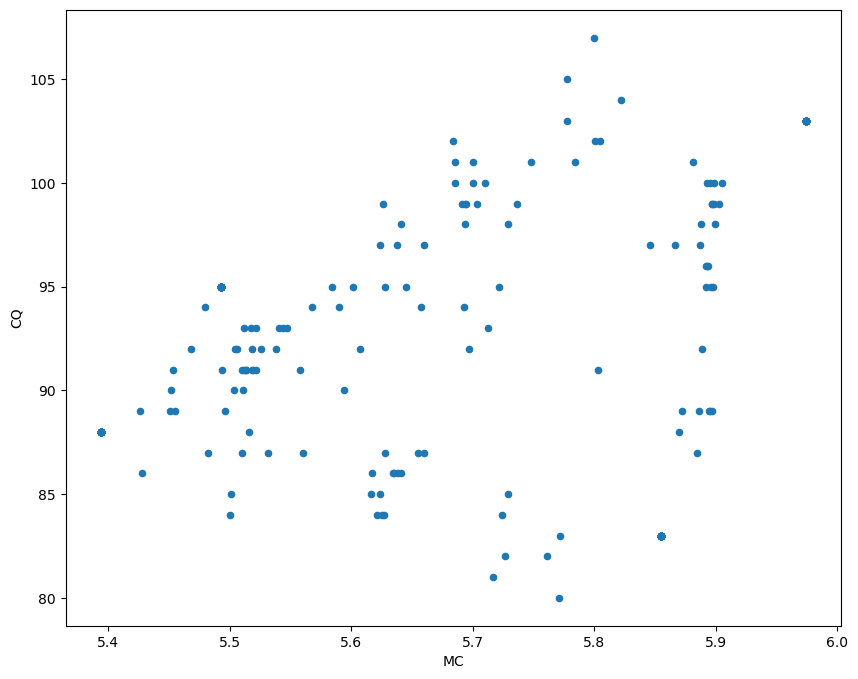

In [73]:
# 从文件中提取trial中的CQ和MC
with open('../saved_studies/CQ_MC_Novelty_20250911_094112.pkl', 'rb') as f:
    results = pickle.load(f)

data = results['trials'][:250]


CQ_list = []
for i in range(len(data)):
    try:
        cq_value = data[i]['user_attrs']['CQ']
    except KeyError:
        cq_value = None  # 或者你可以选择 continue 或其他默认值
    CQ_list.append(cq_value)

MC_list = []
for i in range(len(data)):
    try:
        mc_value = data[i]['user_attrs']['MC']
    except KeyError:
        mc_value = None  # 或者你可以选择 continue 或其他默认值
    MC_list.append(mc_value)

m0_list = []
for i in range(len(data)):
    try:
        m0_value = data[i]['user_attrs']['m0']
    except KeyError:
        m0_value = None  # 或者你可以选择 continue 或其他默认值
    m0_list.append(m0_value)

gamma_list = []
for i in range(len(data)):
    try:
        gamma_value = data[i]['user_attrs']['gamma']
    except KeyError:
        gamma_value = None  # 或者你可以选择 continue 或其他默认值
    gamma_list.append(gamma_value)

# 可视化
plt.figure(figsize=(10, 8))
plt.scatter(MC_list, CQ_list, s=20)
plt.xlabel('MC')
plt.ylabel('CQ')

plt.show()
















400


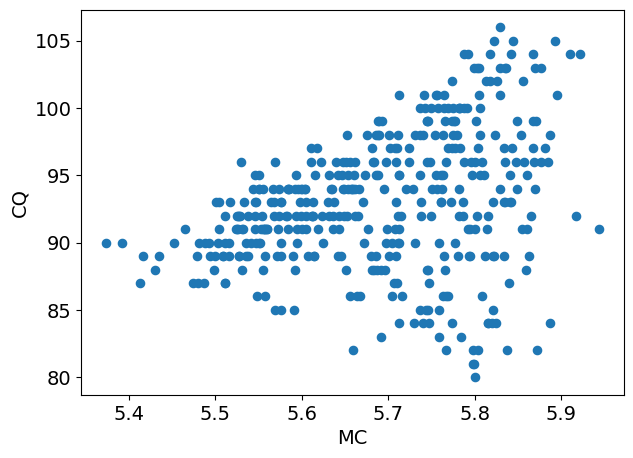

In [85]:
# 从文件中提取trial中的CQ和MC
with open('../saved_studies/CQ_MC_Novelty_RandomSampler_20250915_100644.pkl', 'rb') as f:
    results = pickle.load(f)

data = results['trials']
print(len(data))


CQ_list = []
for i in range(len(data)):
    try:
        cq_value = data[i]['user_attrs']['CQ']
    except KeyError:
        cq_value = None  # 或者你可以选择 continue 或其他默认值
    CQ_list.append(cq_value)

MC_list = []
for i in range(len(data)):
    try:
        mc_value = data[i]['user_attrs']['MC']
    except KeyError:
        mc_value = None  # 或者你可以选择 continue 或其他默认值
    MC_list.append(mc_value)

m0_list = []
for i in range(len(data)):
    try:
        m0_value = data[i]['user_attrs']['m0']
    except KeyError:
        m0_value = None  # 或者你可以选择 continue 或其他默认值
    m0_list.append(m0_value)

gamma_list = []
for i in range(len(data)):
    try:
        gamma_value = data[i]['user_attrs']['gamma']
    except KeyError:
        gamma_value = None  # 或者你可以选择 continue 或其他默认值
    gamma_list.append(gamma_value)

# 可视化
plt.figure(figsize=(7, 5))
plt.scatter(MC_list, CQ_list, s=35)
plt.xlabel('MC',fontsize=14)
plt.ylabel('CQ',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()